In [42]:
# https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py
# https://matplotlib.org/stable/gallery/index
# https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py

In [ ]:
# Using the same data set and results that you were working with in the pandas action items section (Day 4), 
# create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
# histogram of the log of the average total savings.
# line plot of the total jobs created for each month.

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random

In [56]:
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
data.head()
data.columns
data.head(1).T
# data['Company Name'].value_counts()

,0
Company Name,1 State Street
company contact,David Neiburg
company email,eskoblo@energyspec.com
company phone,7186779077
Address,1114 Avenue J
City,Brooklyn
State,NY
Postcode,11230
Industry,Commercial
Industry descr,35 story building


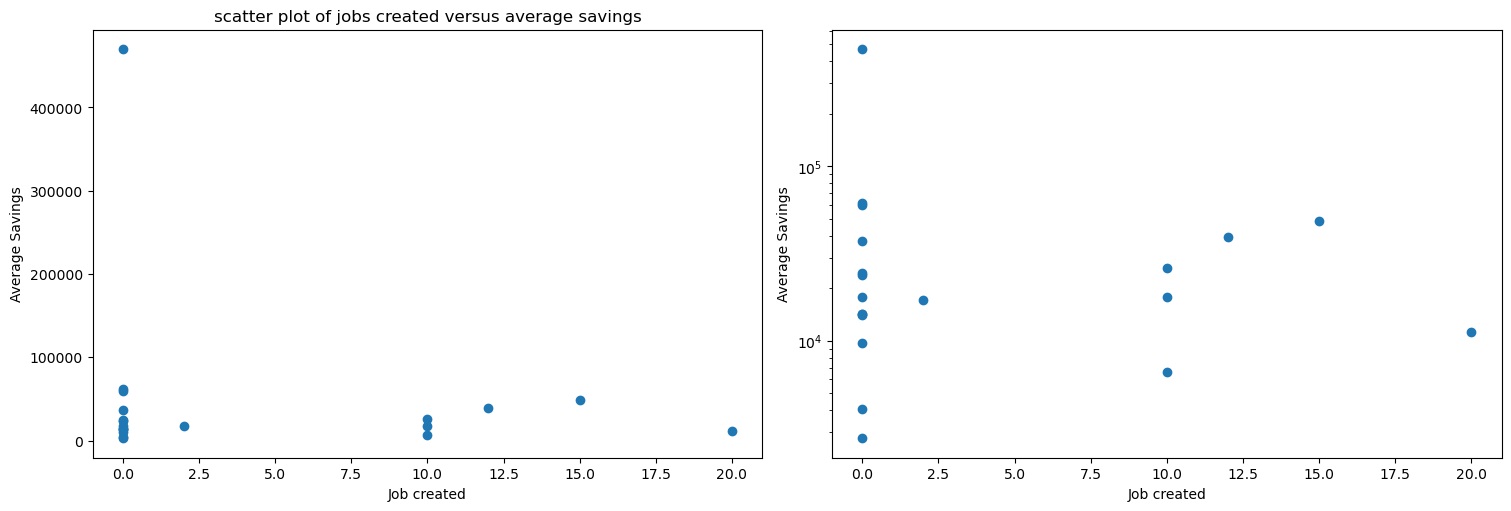

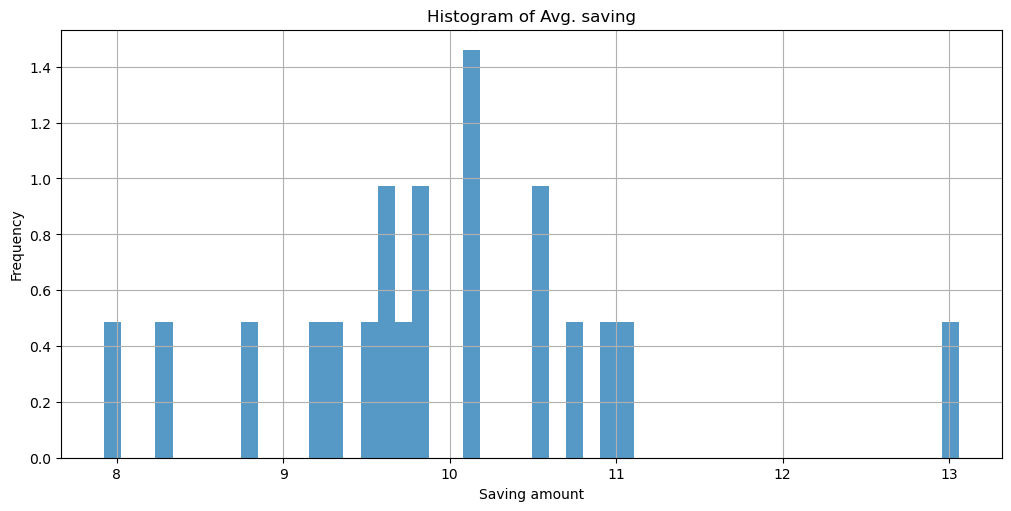

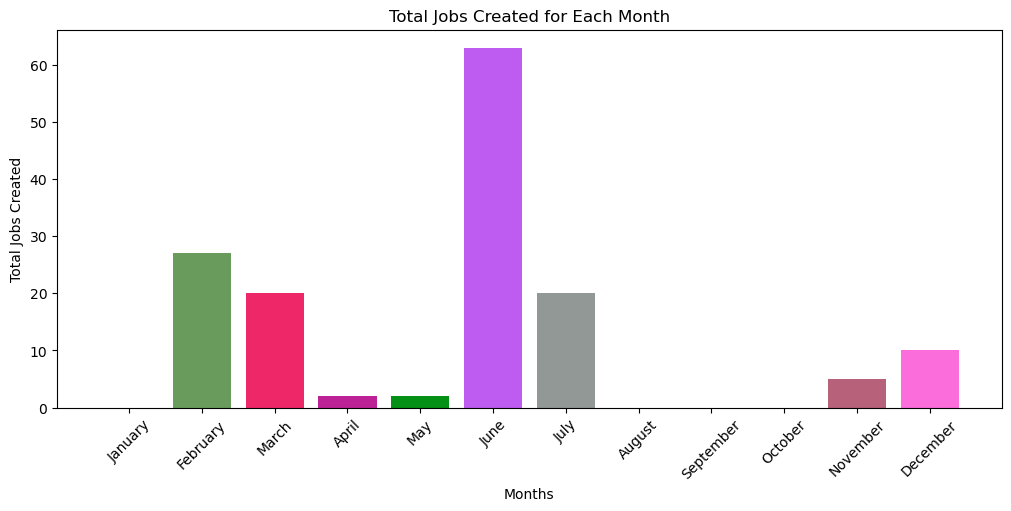

In [85]:
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? (day 4)
nta = data['NTA'].value_counts().reset_index()
nta.columns = ['NTA', 'count']
nta = nta[nta['count']>=5] 
merged_df = pd.merge(data[['Total Savings', 'Job created', 'NTA']], nta, on='NTA', how='inner')
avg_total_savings = merged_df.groupby('NTA')['Total Savings'].mean().reset_index()
total_jobs_created = merged_df.groupby('NTA')['Job created'].sum().reset_index()
result = pd.merge(avg_total_savings, total_jobs_created, on='NTA')
result

# create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].scatter('Job created', 'Total Savings',  data=result)
axs[0].set_xlabel('Job created')
axs[0].set_ylabel('Average Savings')

axs[1].scatter('Job created', 'Total Savings',  data=result, cmap='RdBu_r')
axs[1].set_xlabel('Job created')
axs[1].set_ylabel('Average Savings')
axs[1].set_yscale('log')

axs[0].set_title('scatter plot of jobs created versus average savings')

# histogram of the log of the average total savings.
fig, ax = plt.subplots(figsize=(10,5), layout='constrained')
n, bins, patches = ax.hist(np.log(result['Total Savings']), 50, density=True, facecolor='C0', alpha=0.75)
ax.set_xlabel('Saving amount')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Avg. saving')
ax.grid(True)

# line plot of the total jobs created for each month.
data['month'] = pd.to_datetime(data['Effective Date']).dt.month
jobs_created_per_month = data.groupby('month')['Job created'].sum().reset_index() 

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bar_colors = [random.choice(['#'+format(random.randint(0, 256**3-1), '06x') for _ in range(3)]) for _ in range(len(months))]

fig, ax1 = plt.subplots(figsize=(10, 5), layout='constrained')
x = np.arange(1,len(months)+1)

ax1.bar(x, jobs_created_per_month['Job created'], color = bar_colors)
ax1.set_xticks(x)
ax1.set_xticklabels(months, rotation=45)

ax1.set_xlabel('Months')
ax1.set_ylabel('Total Jobs Created')
ax1.set_title('Total Jobs Created for Each Month')

plt.show()